# 3) Exploratory Data Analysis
<hr style="border:1px solid black"> </hr>

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
import warnings
sb.set()
warnings.filterwarnings("ignore")

In [2]:
campaigndata = pd.read_csv("engineered_data.csv")
campaigndata.head()

,Age,Education,Marital_Status,Income,Year_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Previous,Complain,Response,ChildrenHome
0,65,Graduation,Single,58138.0,10.0,58,635,88,546,172,...,88,3,8,10,4,7,0,0,1,0
1,68,Graduation,Single,46344.0,7.0,38,11,1,6,2,...,6,2,1,1,2,5,0,0,0,2
2,57,Graduation,Together,71613.0,8.0,26,426,49,127,111,...,42,1,8,2,10,4,0,0,0,0
3,38,Graduation,Together,26646.0,7.0,26,11,4,20,10,...,5,2,2,0,4,6,0,0,0,1
4,41,PhD,Married,58293.0,8.0,94,173,43,118,46,...,15,5,5,3,6,5,0,0,0,1


In [3]:
campaigndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Year_Customer        2216 non-null   float64
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [4]:
# Extract numerical variables
numvar = campaigndata.drop(campaigndata.columns[[1,2,17,18]], axis=1)
numvar 

,Age,Income,Year_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,ChildrenHome
0,65,58138.0,10.0,58,635,88,546,172,88,88,3,8,10,4,7,1,0
1,68,46344.0,7.0,38,11,1,6,2,1,6,2,1,1,2,5,0,2
2,57,71613.0,8.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,38,26646.0,7.0,26,11,4,20,10,3,5,2,2,0,4,6,0,1
4,41,58293.0,8.0,94,173,43,118,46,27,15,5,5,3,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,55,61223.0,8.0,46,709,43,182,42,118,247,2,9,3,4,5,0,1
2212,76,64014.0,7.0,56,406,0,30,0,0,8,7,8,2,5,7,0,3
2213,41,56981.0,8.0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2214,66,69245.0,8.0,8,428,30,214,80,30,61,2,6,5,10,3,0,1


## Univariate Analysis

0    1883
1     333
Name: Response, dtype: int64

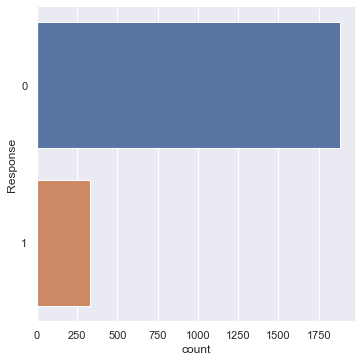

In [5]:
sb.catplot(y="Response", data=numvar, kind="count")
numvar['Response'].value_counts()

Observation: <br>
It seems that there is a significant class imbalance in this dataset. Resampling method can be used to fix this imbalance to minimize the risk of biased prediction.

In [6]:
# Summary of numerical variables
numvar.describe()

,Age,Income,Year_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,ChildrenHome
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,53.179603,52247.251354,8.259477,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.947202
std,11.985554,25173.076661,0.731676,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.749062
min,26.000000,1730.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,35303.000000,8.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,52.000000,51381.500000,8.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,1.000000
75%,63.000000,68522.000000,9.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000
max,129.000000,666666.000000,10.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.000000


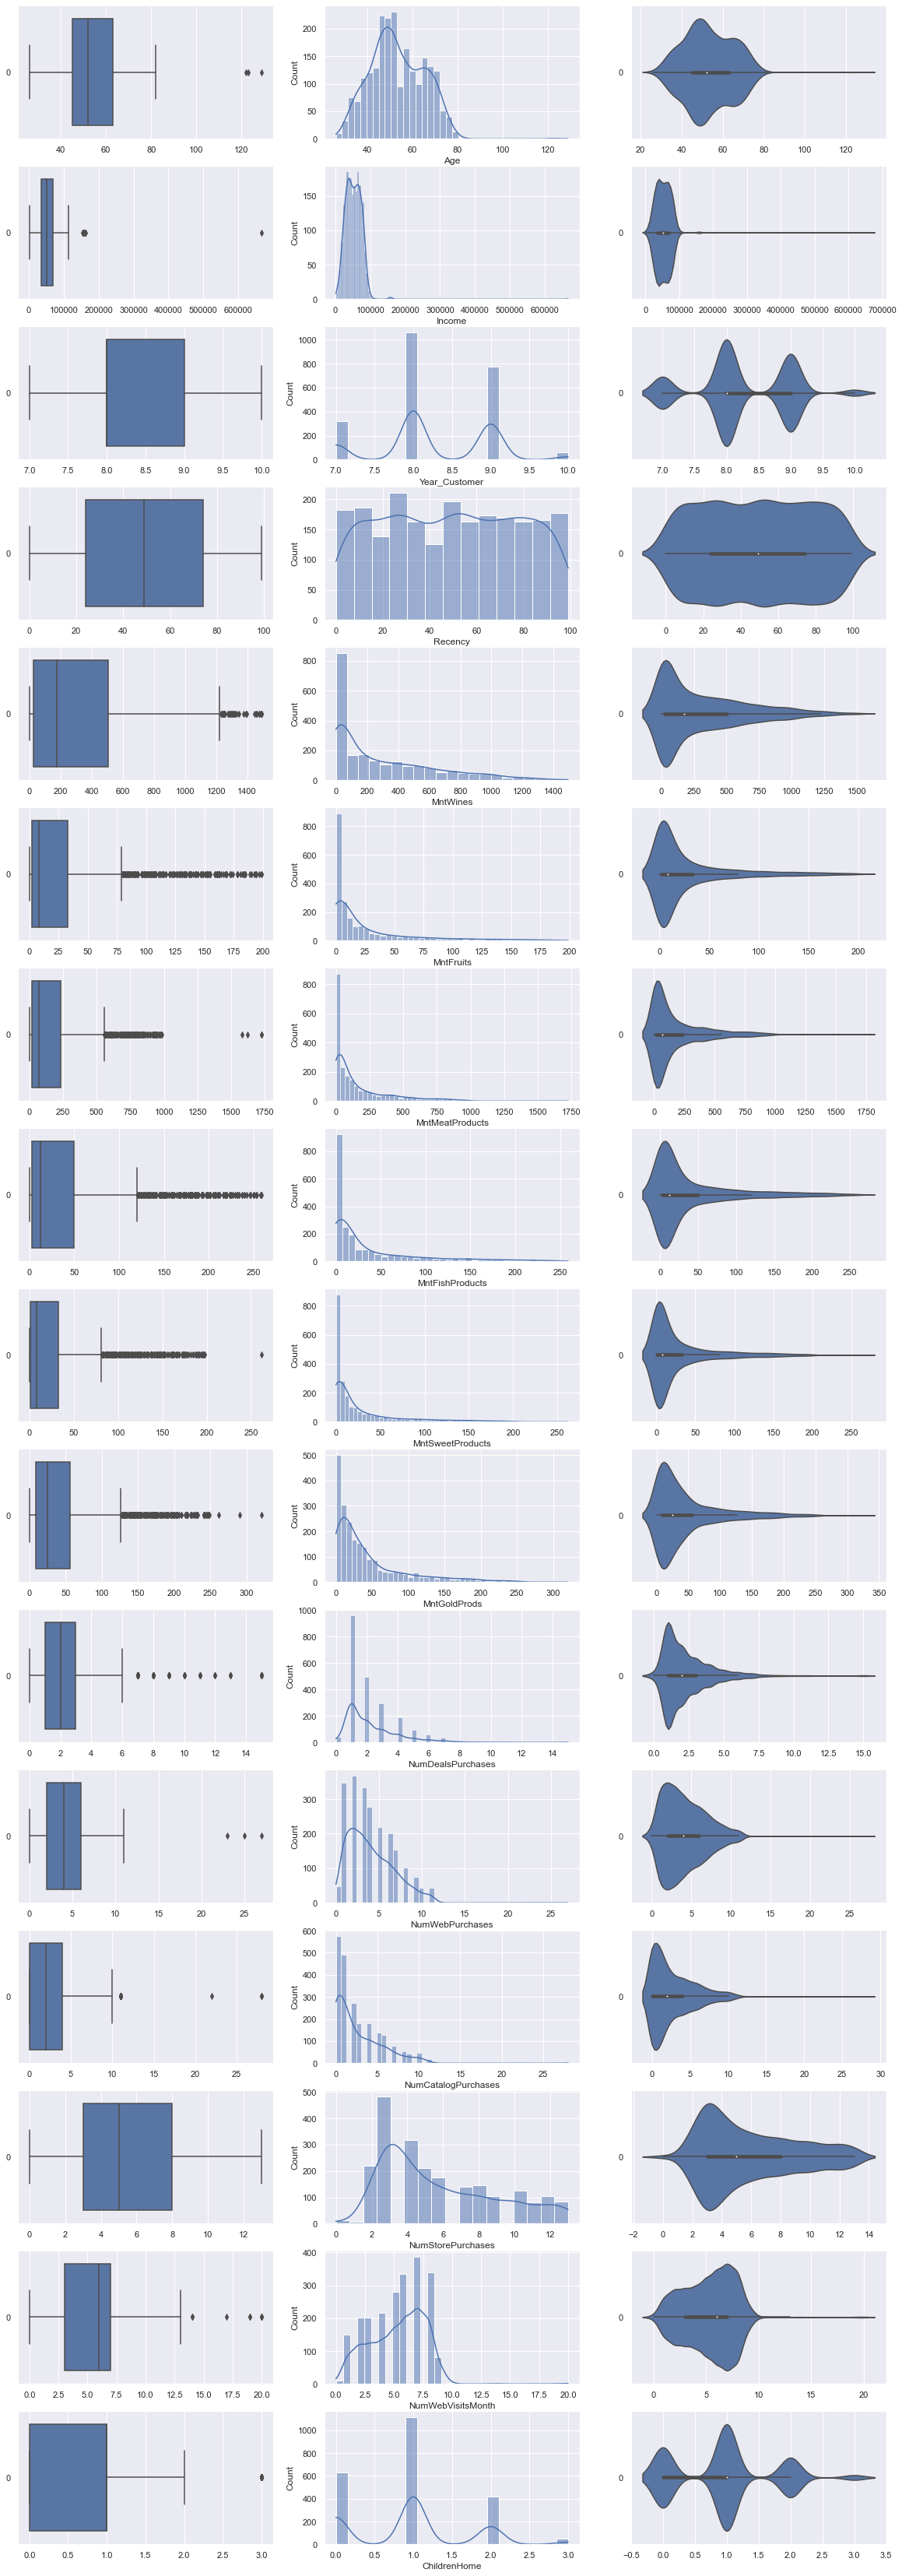

In [7]:
# Distribution of numerical variables
f, axes = plt.subplots(16, 3, figsize=(20, 60))

count = 0
for var in numvar:
    if var == "Response":
        continue;
    sb.boxplot(data=numvar[var], orient="h", ax=axes[count,0])
    sb.histplot(data=numvar[var], kde=True, ax=axes[count,1])
    sb.violinplot(data=numvar[var], orient="h", ax=axes[count,2])
    count += 1

Observation: <br>
Most of the numerical variables do not follow a normal distribution. Transformation to normal distribution can be considered if the supervised algorithms are parametric with normality assumption. 

We see that from the boxplot of **Mnt** variables, there are an amount of outliers present. After further consideration, we decide not to remove the outliers so as to retain the originality of the datasets.

## Bivariate Analysis

## 3.1) Relationship Between Numerical Variables and Response

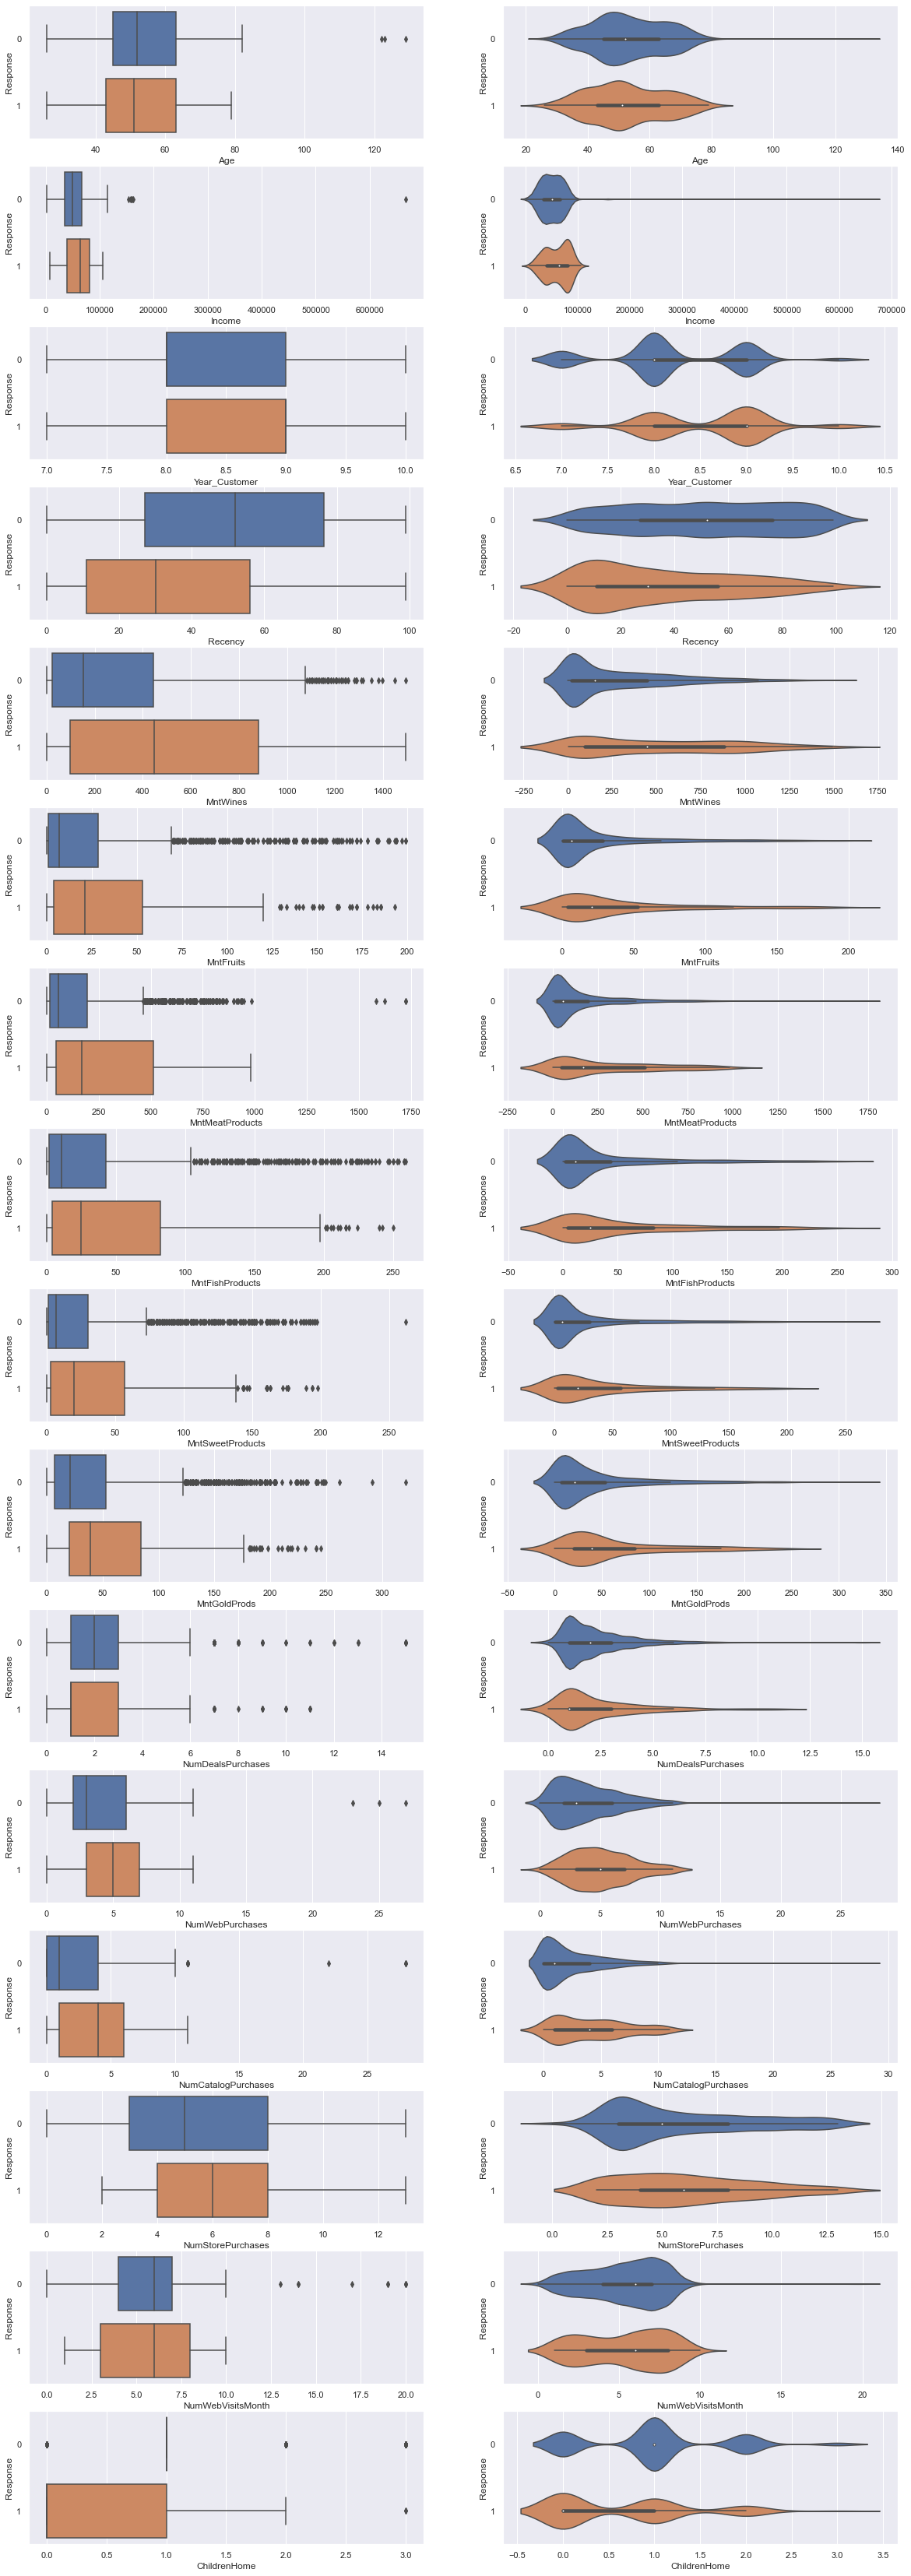

In [8]:
# Visualize relationship between each numerical variables and Response via boxplots and violinplots
f, axes = plt.subplots(16, 2, figsize=(20, 60))

count = 0
for var in numvar:
    if var == "Response":
        continue;
    sb.boxplot(x=var, y="Response", data=numvar, orient="h", ax=axes[count,0])
    sb.violinplot(x=var, y="Response", data=numvar, orient="h", ax=axes[count,1])
    count += 1

Observation; <br>
There is no strong separation of response in these numerical variables that suggest outstanding features. Small separations are observed in all the "Mnt..." variables, suggesting the type of products purchased may be useful for predicting the response. 

We notice there are slight seperation in **Recency**, where it might suggest that it is useful in predicting the response.

We also notice that in the boxplot of **ChildrenHome**, it has an obvious variant of its Response "0" and "1".

## 3.2) Relationship Between Categorical Variables and Response

In [9]:
# Extract categorical variables
catvar = campaigndata[['Education','Marital_Status','Complain','Previous','Response']]
catvar

,Education,Marital_Status,Complain,Previous,Response
0,Graduation,Single,0,0,1
1,Graduation,Single,0,0,0
2,Graduation,Together,0,0,0
3,Graduation,Together,0,0,0
4,PhD,Married,0,0,0
...,...,...,...,...,...
2211,Graduation,Married,0,0,0
2212,PhD,Together,0,1,0
2213,Graduation,Divorced,0,1,0
2214,Master,Together,0,0,0


    Education  Response  percentage
0    2n Cycle         0   89.000000
1    2n Cycle         1   11.000000
2       Basic         0   96.296296
3       Basic         1    3.703704
4  Graduation         0   86.379928
5  Graduation         1   13.620072
6      Master         0   84.657534
7      Master         1   15.342466
8         PhD         0   79.002079
9         PhD         1   20.997921 

  Marital_Status  Response  percentage
0       Divorced         0   79.310345
1       Divorced         1   20.689655
2        Married         0   88.564761
3        Married         1   11.435239
4         Single         0   77.075812
5         Single         1   22.924188
6       Together         0   89.528796
7       Together         1   10.471204 

   Complain  Response  percentage
0         0         0   84.965831
1         0         1   15.034169
2         1         0   85.714286
3         1         1   14.285714 

   Previous  Response  percentage
0         0         0   91.690381
1        

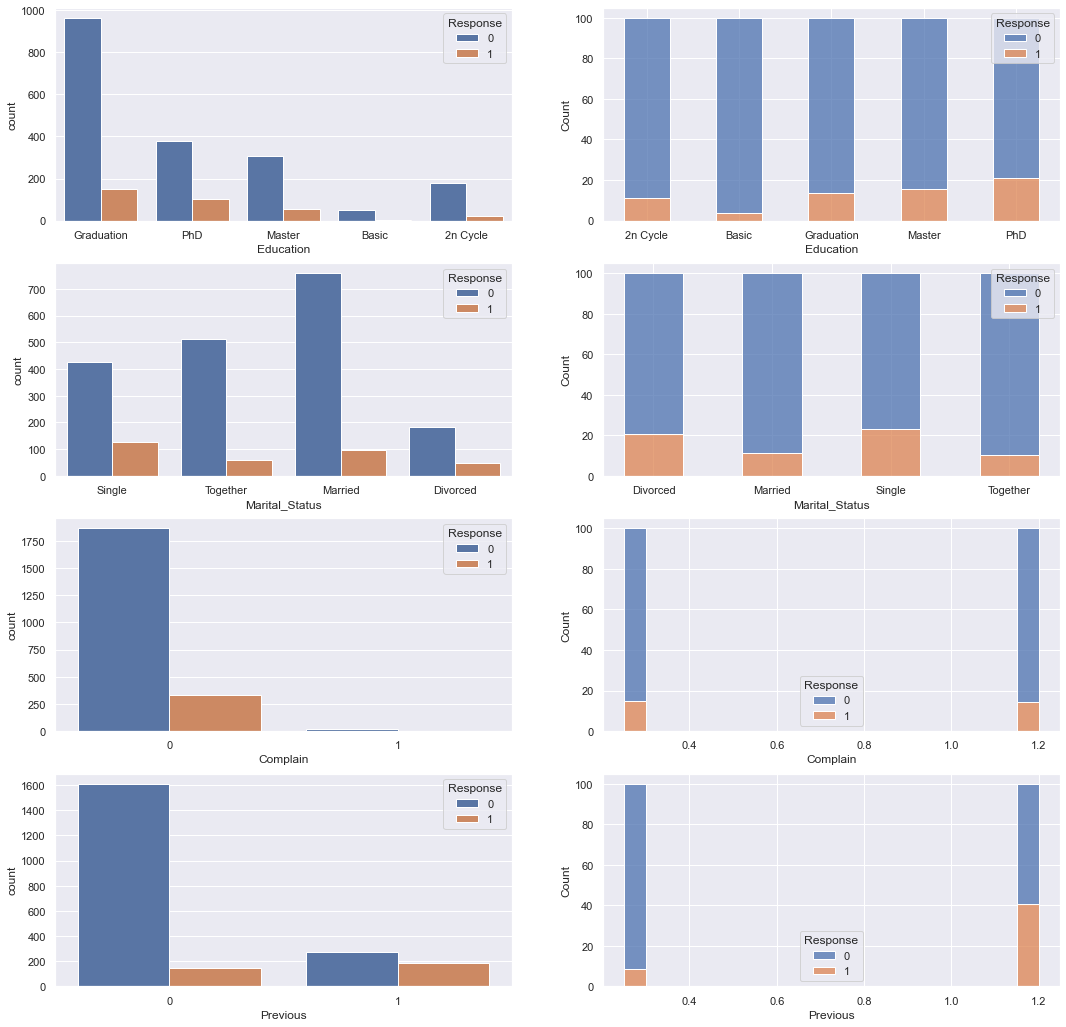

In [10]:
# Distribution of each categorical variable with respect to Response via countplot and percentage stackbar
f, axes = plt.subplots(4, 2, figsize=(18, 18))
count = 0
for var in catvar:
    if var == 'Response':
        continue
    percentage = catvar.groupby([var])['Response'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
    print(percentage, '\n')
    sb.countplot(x=var, hue='Response', data=catvar, ax=axes[count,0])
    sb.histplot(x=var, hue='Response', weights='percentage', multiple='stack', data=percentage, shrink=0.5, ax=axes[count,1])
    count += 1

In [19]:
for i in ['Education','Marital_Status','Complain','Previous','Response']:
    print(catvar[i].value_counts())
    print()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Married     857
Together    573
Single      554
Divorced    232
Name: Marital_Status, dtype: int64

0    2195
1      21
Name: Complain, dtype: int64

0    1757
1     459
Name: Previous, dtype: int64

0    1883
1     333
Name: Response, dtype: int64



Observation: <br>
Here we can see that in **Marital_Status**, each levels differs a lot from each other. There might be a significance for it to predict response.

From the categorical plot of  **Previous** and **Complain**, we see that most of the data saturated at where their values are equals to 0. From there, we note that majority of the response were **0** (rejected the offer). This implies that there might be a useful relationship in using these variables mentioned to predict the response.

We will validate it using our Machine Learning Models.